In [1]:
import pandas, numpy
import sklearn, sklearn.preprocessing, sklearn.impute, sklearn.decomposition

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(9, 6)})

# 0. user defined variables

In [2]:
untargetted_data_file = '/home/adrian/projects/HUVECs/data/untargetted/AllBatches/ROSA_ACID_NEG_UT_NOMISNORM_AllBatches.csv'
untargetted_data_file = '/Users/adrian/gd15/hi/research/huvec/data/ROSA_ACID_NEG_UT_NOMISNORM_AllBatches.csv'

# 1. read data

In [3]:
df = pandas.read_csv(untargetted_data_file, sep=',')
df.head()

,Sample,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,...,X737.14193,X740.16098,X740.71343000000002,X740.73257999999998,X740.74688000000003,X743.16147000000001,X743.48454000000004,X745.12892999999997,X745.14395999999999,X745.16129000000001
0,EC_Rosa_1_650,29,100,1,390000.0,24,5.852441,5.932726,5.051917,6.345683,...,5.733799,6.246663,7.201546,7.119625,7.096909,6.742333,5.687035,5.426009,5.642669,5.644448
1,EC_Rosa_1_651,6,EGM,1,560000.0,4,5.462459,5.891913,5.674451,6.460181,...,5.427957,6.217484,6.905804,6.942619,6.920406,6.188310,5.390414,6.422549,6.334127,6.313065
2,EC_Rosa_1_652,15,100,1,205000.0,4,5.031187,6.234452,5.298766,6.377965,...,4.870114,5.607866,6.688953,6.825913,6.793644,5.682537,5.083870,4.992752,5.381865,5.369995
3,EC_Rosa_1_653,26,10,1,525000.0,24,5.221399,5.712806,4.806511,6.193561,...,5.410174,6.281541,6.345312,6.482471,6.455920,6.475335,5.546431,6.060435,6.212212,6.286286
4,EC_Rosa_1_654,20,EGM,1,830000.0,24,5.786133,6.009039,5.477244,6.049853,...,4.865940,5.866259,6.888398,7.034687,7.036220,6.034948,5.554022,5.841243,6.112518,6.127484


# 2. analysis

In [4]:
# compute normalized value
info = df.iloc[:, :6]
info.head()

,Sample,Number,Treatment,Batch,Cell number,TIME
0,EC_Rosa_1_650,29,100,1,390000.0,24
1,EC_Rosa_1_651,6,EGM,1,560000.0,4
2,EC_Rosa_1_652,15,100,1,205000.0,4
3,EC_Rosa_1_653,26,10,1,525000.0,24
4,EC_Rosa_1_654,20,EGM,1,830000.0,24


In [5]:
nbcn = df.iloc[:, 6:]
nbcn.head()

,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,...,X737.14193,X740.16098,X740.71343000000002,X740.73257999999998,X740.74688000000003,X743.16147000000001,X743.48454000000004,X745.12892999999997,X745.14395999999999,X745.16129000000001
0,5.852441,5.932726,5.051917,6.345683,6.097337,6.380415,8.783008,7.343394,5.923638,6.124354,...,5.733799,6.246663,7.201546,7.119625,7.096909,6.742333,5.687035,5.426009,5.642669,5.644448
1,5.462459,5.891913,5.674451,6.460181,6.203644,6.171597,8.776677,7.662557,5.725006,5.875586,...,5.427957,6.217484,6.905804,6.942619,6.920406,6.188310,5.390414,6.422549,6.334127,6.313065
2,5.031187,6.234452,5.298766,6.377965,6.135880,6.448733,8.799498,8.328993,5.363318,5.673778,...,4.870114,5.607866,6.688953,6.825913,6.793644,5.682537,5.083870,4.992752,5.381865,5.369995
3,5.221399,5.712806,4.806511,6.193561,6.361619,6.310878,8.529330,7.415047,5.502126,5.983241,...,5.410174,6.281541,6.345312,6.482471,6.455920,6.475335,5.546431,6.060435,6.212212,6.286286
4,5.786133,6.009039,5.477244,6.049853,6.285863,6.221632,9.270877,8.432439,4.911845,5.429880,...,4.865940,5.866259,6.888398,7.034687,7.036220,6.034948,5.554022,5.841243,6.112518,6.127484


In [6]:
nbcn = nbcn.div(df['Cell  number']/1e6, axis=0)
nbcn.head()

,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,...,X737.14193,X740.16098,X740.71343000000002,X740.73257999999998,X740.74688000000003,X743.16147000000001,X743.48454000000004,X745.12892999999997,X745.14395999999999,X745.16129000000001
0,15.006258,15.212117,12.953634,16.270983,15.634198,16.360037,22.520534,18.829216,15.188816,15.703472,...,14.702049,16.017085,18.465503,18.255449,18.197202,17.288033,14.582141,13.912843,14.468383,14.472944
1,9.754391,10.521273,10.132949,11.536037,11.077936,11.020709,15.672637,13.683137,10.223224,10.492118,...,9.692781,11.102651,12.331793,12.397534,12.357868,11.050554,9.625739,11.468837,11.310942,11.273330
2,24.542374,30.411959,25.847641,31.112022,29.931124,31.457236,42.924379,40.629233,26.162527,27.676966,...,23.756654,27.355442,32.629037,33.297136,33.139729,27.719694,24.799367,24.354890,26.252998,26.195098
3,9.945521,10.881535,9.155259,11.797260,12.117370,12.020721,16.246342,14.123898,10.480240,11.396649,...,10.305093,11.964839,12.086309,12.347565,12.296991,12.333971,10.564631,11.543686,11.832785,11.973878
4,6.971244,7.239806,6.599089,7.288980,7.573329,7.495943,11.169732,10.159565,5.917885,6.542024,...,5.862579,7.067782,8.299275,8.475527,8.477373,7.271022,6.691593,7.037642,7.364479,7.382511


In [7]:
normalized_met = pandas.concat([info, nbcn.reindex(info.index)], axis=1)
normalized_met.head()

,Sample,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,...,X737.14193,X740.16098,X740.71343000000002,X740.73257999999998,X740.74688000000003,X743.16147000000001,X743.48454000000004,X745.12892999999997,X745.14395999999999,X745.16129000000001
0,EC_Rosa_1_650,29,100,1,390000.0,24,15.006258,15.212117,12.953634,16.270983,...,14.702049,16.017085,18.465503,18.255449,18.197202,17.288033,14.582141,13.912843,14.468383,14.472944
1,EC_Rosa_1_651,6,EGM,1,560000.0,4,9.754391,10.521273,10.132949,11.536037,...,9.692781,11.102651,12.331793,12.397534,12.357868,11.050554,9.625739,11.468837,11.310942,11.273330
2,EC_Rosa_1_652,15,100,1,205000.0,4,24.542374,30.411959,25.847641,31.112022,...,23.756654,27.355442,32.629037,33.297136,33.139729,27.719694,24.799367,24.354890,26.252998,26.195098
3,EC_Rosa_1_653,26,10,1,525000.0,24,9.945521,10.881535,9.155259,11.797260,...,10.305093,11.964839,12.086309,12.347565,12.296991,12.333971,10.564631,11.543686,11.832785,11.973878
4,EC_Rosa_1_654,20,EGM,1,830000.0,24,6.971244,7.239806,6.599089,7.288980,...,5.862579,7.067782,8.299275,8.475527,8.477373,7.271022,6.691593,7.037642,7.364479,7.382511


In [8]:
# remove conditions for which cell numbers are not available
print('conditions before filtering {}'.format(normalized_met.shape[0]))
finite_normalized_met = normalized_met[numpy.isfinite(normalized_met['Cell  number']) == True]
print('conditions after filtering {}'.format(finite_normalized_met.shape[0]))

conditions before filtering 130
conditions after filtering 121


## 2.1. reproduce aspartate face values

In [9]:
aspartate = 'X132.02816000000001'

In [10]:
treatments = ['EGM', '1', '10', '100']
timepoints = [0, 4, 24]

conditions = [('EGM', 0), ('EGM', 4), ('EGM', 24)]
for treatment in treatments[1:]:
    for timepoint in timepoints[1:]:
        condition = (treatment, timepoint)
        conditions.append(condition)
print(conditions)

[('EGM', 0), ('EGM', 4), ('EGM', 24), ('1', 4), ('1', 24), ('10', 4), ('10', 24), ('100', 4), ('100', 24)]


In [11]:
all_values = []
for condition in conditions:
    treatment = condition[0]; timepoint = condition[1]
    sub = df[(df['Treatment'] == treatment) & (df['TIME'] == timepoint)][aspartate]
        
    print('Concentration {}, time {}. Shape: {}, mean: {}'.format(treatment, timepoint, sub.shape, sub.mean()))
    all_values.append(sub.values)
    
all_values

Concentration EGM, time 0. Shape: (12,), mean: 7.343031736286506
Concentration EGM, time 4. Shape: (15,), mean: 8.868329472141601
Concentration EGM, time 24. Shape: (15,), mean: 7.304257421063323
Concentration 1, time 4. Shape: (14,), mean: 8.821303691013558
Concentration 1, time 24. Shape: (15,), mean: 7.390989497928169
Concentration 10, time 4. Shape: (15,), mean: 8.804348951707045
Concentration 10, time 24. Shape: (14,), mean: 7.333990729503225
Concentration 100, time 4. Shape: (15,), mean: 8.271465767579647
Concentration 100, time 24. Shape: (15,), mean: 7.423921784663565


[array([6.97381249, 7.86875196, 7.61601411, 7.64209347, 6.82749904,
        7.04961006, 8.16970626, 7.98315834, 7.76176148, 6.77642625,
        6.79367524, 6.65387214]),
 array([9.37461667, 8.78037246, 8.79395988, 8.42953792, 8.9420639 ,
        8.60964437, 8.72204321, 8.45787986, 9.43701047, 9.08864372,
        8.74412504, 7.85072122, 9.46686393, 9.45153013, 8.87592929]),
 array([7.66049488, 6.99494704, 6.59817573, 6.26464214, 6.34950145,
        6.29537229, 7.04258622, 7.96124484, 7.64528383, 7.54877893,
        7.73556476, 6.84832813, 8.05849179, 8.07486975, 8.48557954]),
 array([8.57898172, 8.8827671 , 9.32005122, 9.17907447, 8.53974885,
        8.74264152, 8.82299468, 9.28118644, 9.06395508, 8.69443088,
        6.992276  , 8.19057782, 9.68561631, 9.5239496 ]),
 array([6.58834641, 7.12179503, 7.06989725, 7.29034386, 6.30430414,
        6.28775651, 7.98596093, 7.38518432, 8.13681362, 6.85519999,
        7.39040551, 6.6865201 , 7.99230162, 9.01940817, 8.75060503]),
 array([7.99969139

([<matplotlib.axis.XTick at 0x7f86202021f0>,
 [Text(1, 0, '0|4h'),
  Text(2, 0, '0|24h'),
  Text(3, 0, '0.5|4h'),
  Text(4, 0, '0.5|24h'),
  Text(5, 0, '5|4h'),
  Text(6, 0, '5|24h'),
  Text(7, 0, '50|4 h'),
  Text(8, 0, '50|24h')])

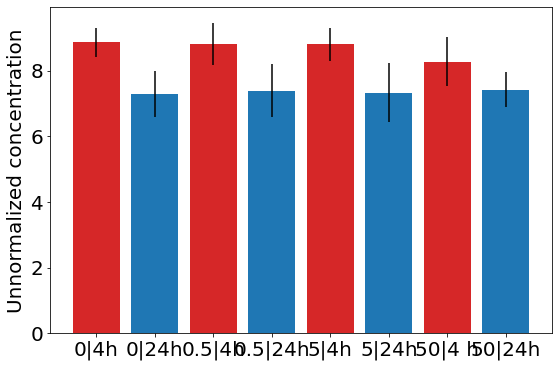

In [12]:
bar_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8]
bar_heights = [numpy.mean(element) for element in all_values]
bar_error = [numpy.std(element) for element in all_values]
the_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red', 'tab:blue']
matplotlib.pyplot.bar(bar_positions[1:], height=bar_heights[1:], yerr=bar_error[1:], color=the_colors)

matplotlib.pyplot.ylabel('Unnormalized concentration')
matplotlib.pyplot.xticks(bar_positions[1:], ['0|4h', '0|24h', '0.5|4h', '0.5|24h', '5|4h', '5|24h', '50|4 h', '50|24h'])

## 2.2. reproduce aspartate normalized by cell numbers

In [13]:
all_values = []
for condition in conditions:
    treatment = condition[0]; timepoint = condition[1]
    sub = finite_normalized_met[(finite_normalized_met['Treatment'] == treatment) & (finite_normalized_met['TIME'] == timepoint)][aspartate]
        
    print('Concentration {}, time {}. Shape: {}, mean: {}'.format(treatment, timepoint, sub.shape, sub.mean()))
    #working_values = [value for value in sub.values if numpy.isfinite(value)]
    #all_values.append(working_values)
    all_values.append(sub.values)
    
all_values

Concentration EGM, time 0. Shape: (6,), mean: 20.282051893077494
Concentration EGM, time 4. Shape: (15,), mean: 23.806987589060814
Concentration EGM, time 24. Shape: (15,), mean: 15.298943210664932
Concentration 1, time 4. Shape: (14,), mean: 26.620919450233362
Concentration 1, time 24. Shape: (15,), mean: 16.875756472831583
Concentration 10, time 4. Shape: (15,), mean: 25.2490188962116
Concentration 10, time 24. Shape: (14,), mean: 15.909122345436087
Concentration 100, time 4. Shape: (15,), mean: 27.705304822113494
Concentration 100, time 24. Shape: (12,), mean: 12.949968233929496


[array([14.52877602, 16.39323324, 15.86669607, 25.09787498, 25.16176014,
        24.6439709 ]),
 array([16.74038692, 15.67923653, 15.70349979, 33.05701145, 35.06691726,
        33.76331127, 27.25638502, 26.43087457, 29.49065771, 25.96755348,
        24.9832144 , 22.43063205, 17.21247988, 17.18460024, 16.13805326]),
 array([ 9.22951191,  8.42764704,  7.94960931,  8.58170156,  8.69794719,
         8.62379766, 10.83474803, 12.24806899, 11.76197512, 33.55012859,
        34.38028783, 30.43701389, 14.65180325, 14.68158137, 15.42832643]),
 array([16.82153278, 17.41719039, 18.27461024, 33.37845261, 31.05363217,
        31.79142372, 19.18042322, 20.17649226, 19.70425018, 47.77159822,
        38.41909888, 45.00317483, 16.99230931, 16.70868351]),
 array([11.26213062, 12.1740086 , 12.08529445, 11.57197438, 10.00683196,
         9.98056589, 10.64794791,  9.84691242, 10.84908482, 11.42533331,
        12.31734251, 11.14420016, 37.17349589, 41.95073568, 40.70048849]),
 array([21.05181945, 25.78543287,

([<matplotlib.axis.XTick at 0x7f8634464670>,
 [Text(1, 0, '0|4h'),
  Text(2, 0, '0|24h'),
  Text(3, 0, '0.5|4h'),
  Text(4, 0, '0.5|24h'),
  Text(5, 0, '5|4h'),
  Text(6, 0, '5|24h'),
  Text(7, 0, '50|4 h'),
  Text(8, 0, '50|24h')])

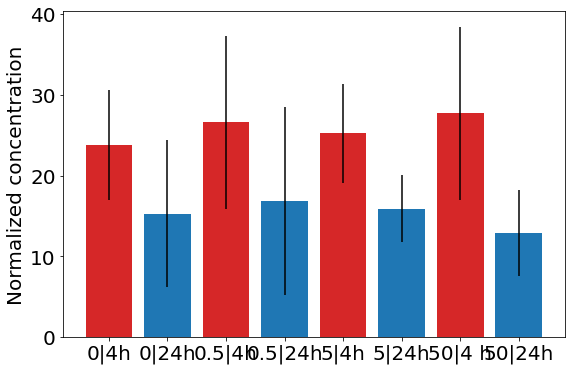

In [14]:
bar_positions = [0, 1, 2, 3, 4, 5, 6, 7, 8]
bar_heights = [numpy.mean(element) for element in all_values]
bar_error = [numpy.std(element) for element in all_values]
the_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red', 'tab:blue']
matplotlib.pyplot.bar(bar_positions[1:], height=bar_heights[1:], yerr=bar_error[1:], color=the_colors)

matplotlib.pyplot.ylabel('Normalized concentration')
matplotlib.pyplot.xticks(bar_positions[1:], ['0|4h', '0|24h', '0.5|4h', '0.5|24h', '5|4h', '5|24h', '50|4 h', '50|24h'])

# 2.3. aspartate boxplots

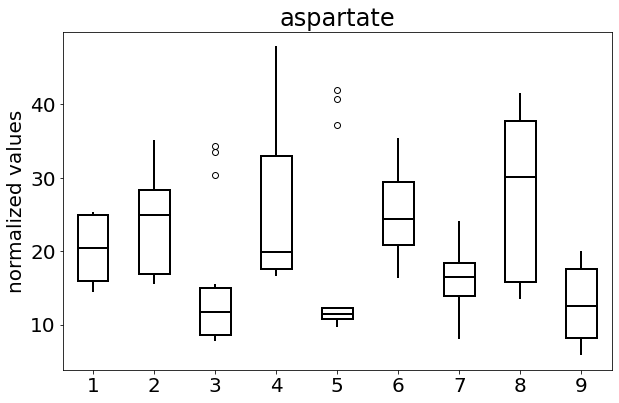

In [15]:
matplotlib.pyplot.boxplot(all_values, boxprops={'lw':2, 'facecolor':'white'}, medianprops={'lw':2, 'color':'black'}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True)

matplotlib.pyplot.ylabel('normalized values')
matplotlib.pyplot.title('aspartate')
matplotlib.pyplot.tight_layout()

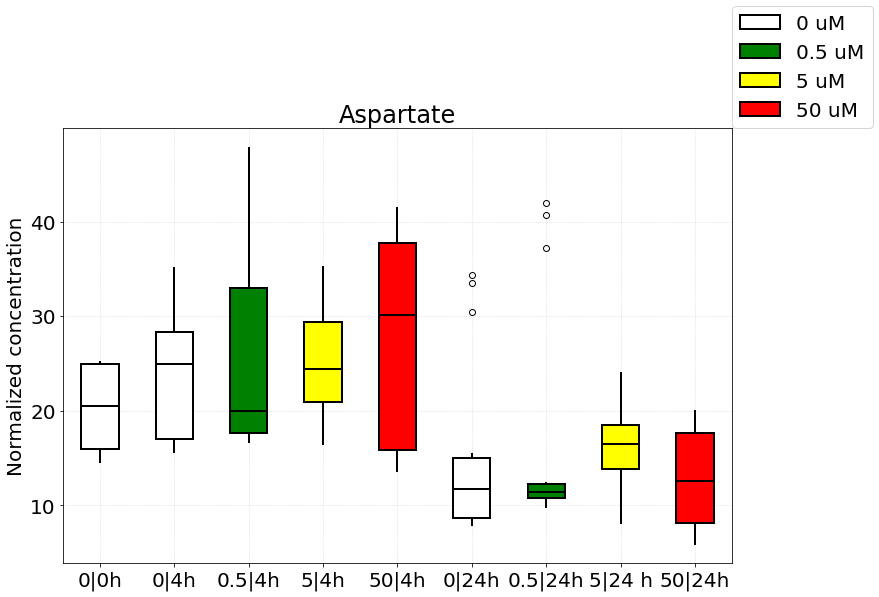

In [16]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12,8))

bpw1 = ax.boxplot(all_values[:2], boxprops={'lw':2, 'facecolor':'white'}, medianprops={'lw':2, 'color':'black'}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True, positions=[1,2], widths=0.5)

bpw2 = ax.boxplot(all_values[2], boxprops={'lw':2, 'facecolor':'white'}, medianprops={'lw':2, 'color':'black'}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True, positions=[6], widths=0.5)

bpg = ax.boxplot(all_values[3:5], boxprops={'lw':2, 'facecolor':'green'}, medianprops={'lw':2, 'color':'black'}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True, positions=[3, 7], widths=0.5)

bpy = ax.boxplot(all_values[5:7], boxprops={'lw':2, 'facecolor':'yellow'}, medianprops={'lw':2, 'color':'black'}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True, positions=[4, 8], widths=0.5)

bpr = ax.boxplot(all_values[7:9], boxprops={'lw':2, 'facecolor':'red'}, medianprops={'lw':2, 'color':'black'}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True, positions=[5, 9], widths=0.5)

matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['0|0h', '0|4h', '0.5|4h', '5|4h', '50|4h','0|24h', '0.5|24h', '5|24 h', '50|24h'], )
matplotlib.pyplot.title('Aspartate')
matplotlib.pyplot.ylabel('Normalized concentration')

ax.legend([bpw1["boxes"][0], bpg["boxes"][0], bpy['boxes'][0], bpr['boxes'][0]], ['0 uM', '0.5 uM', '5 uM', '50 uM'], loc=(1,1))

## 2.4. PCA

In [17]:
peak_names = finite_normalized_met.columns[6:]
peak_names

Index(['X59.01097', 'X61.017890000000001', 'X67.016220000000004',
       'X74.021450000000002', 'X77.052040000000005', 'X77.052049999999994',
       'X78.956580000000002', 'X78.956770000000006', 'X79.955420000000004',
       'X80.962869999999995',
       ...
       'X737.14193', 'X740.16098', 'X740.71343000000002',
       'X740.73257999999998', 'X740.74688000000003', 'X743.16147000000001',
       'X743.48454000000004', 'X745.12892999999997', 'X745.14395999999999',
       'X745.16129000000001'],
      dtype='object', length=1018)

In [18]:
finite_normalized_met.head()

,Sample,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,...,X737.14193,X740.16098,X740.71343000000002,X740.73257999999998,X740.74688000000003,X743.16147000000001,X743.48454000000004,X745.12892999999997,X745.14395999999999,X745.16129000000001
0,EC_Rosa_1_650,29,100,1,390000.0,24,15.006258,15.212117,12.953634,16.270983,...,14.702049,16.017085,18.465503,18.255449,18.197202,17.288033,14.582141,13.912843,14.468383,14.472944
1,EC_Rosa_1_651,6,EGM,1,560000.0,4,9.754391,10.521273,10.132949,11.536037,...,9.692781,11.102651,12.331793,12.397534,12.357868,11.050554,9.625739,11.468837,11.310942,11.273330
2,EC_Rosa_1_652,15,100,1,205000.0,4,24.542374,30.411959,25.847641,31.112022,...,23.756654,27.355442,32.629037,33.297136,33.139729,27.719694,24.799367,24.354890,26.252998,26.195098
3,EC_Rosa_1_653,26,10,1,525000.0,24,9.945521,10.881535,9.155259,11.797260,...,10.305093,11.964839,12.086309,12.347565,12.296991,12.333971,10.564631,11.543686,11.832785,11.973878
4,EC_Rosa_1_654,20,EGM,1,830000.0,24,6.971244,7.239806,6.599089,7.288980,...,5.862579,7.067782,8.299275,8.475527,8.477373,7.271022,6.691593,7.037642,7.364479,7.382511


In [19]:

treatment_labels = finite_normalized_met["Treatment"].to_list() 
time_labels = finite_normalized_met["TIME"].to_list()
print(time_labels)
labels = [treatment_labels[i] + '_' + str(time_labels[i]) for i in range(len(treatment_labels))]
print(labels, len(labels))
#labels.sort()
#print(labels)
finite_normalized_met.insert(1, 'labels', labels)
finite_normalized_met.head()

[24, 4, 4, 24, 24, 4, 24, 4, 0, 24, 24, 4, 0, 4, 0, 24, 4, 4, 4, 4, 4, 24, 24, 24, 4, 24, 24, 4, 24, 24, 4, 4, 4, 24, 4, 24, 4, 24, 4, 24, 24, 24, 4, 4, 4, 24, 24, 24, 24, 4, 4, 4, 24, 24, 24, 24, 4, 4, 24, 24, 24, 4, 24, 4, 4, 4, 4, 24, 4, 4, 24, 24, 4, 4, 24, 4, 24, 24, 0, 4, 4, 4, 24, 4, 24, 4, 4, 4, 4, 24, 24, 0, 4, 24, 24, 0, 4, 4, 24, 24, 4, 24, 24, 4, 4, 24, 4, 4, 24, 4, 4, 4, 24, 4, 24, 24, 24, 4, 24, 24, 4]
['100_24', 'EGM_4', '100_4', '10_24', 'EGM_24', 'EGM_4', '10_24', 'EGM_4', 'EGM_0', '100_24', '1_24', '100_4', 'EGM_0', '1_4', 'EGM_0', 'EGM_24', '10_4', '1_4', '100_4', '10_4', '1_4', '1_24', '100_24', '10_24', '10_4', 'EGM_24', '1_24', '100_4', '10_24', '10_24', '100_4', '1_4', '10_4', '100_24', '1_4', 'EGM_24', '100_4', 'EGM_24', '10_4', '100_24', '1_24', '10_24', '1_4', 'EGM_4', 'EGM_4', '1_24', 'EGM_24', '1_24', '100_24', 'EGM_4', '10_4', '1_4', '10_24', '100_24', '1_24', 'EGM_24', '1_4', '10_4', '100_24', '1_24', '10_24', 'EGM_4', '1_24', 'EGM_4', '100_4', '100_4', '1

,Sample,labels,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,...,X737.14193,X740.16098,X740.71343000000002,X740.73257999999998,X740.74688000000003,X743.16147000000001,X743.48454000000004,X745.12892999999997,X745.14395999999999,X745.16129000000001
0,EC_Rosa_1_650,100_24,29,100,1,390000.0,24,15.006258,15.212117,12.953634,...,14.702049,16.017085,18.465503,18.255449,18.197202,17.288033,14.582141,13.912843,14.468383,14.472944
1,EC_Rosa_1_651,EGM_4,6,EGM,1,560000.0,4,9.754391,10.521273,10.132949,...,9.692781,11.102651,12.331793,12.397534,12.357868,11.050554,9.625739,11.468837,11.310942,11.273330
2,EC_Rosa_1_652,100_4,15,100,1,205000.0,4,24.542374,30.411959,25.847641,...,23.756654,27.355442,32.629037,33.297136,33.139729,27.719694,24.799367,24.354890,26.252998,26.195098
3,EC_Rosa_1_653,10_24,26,10,1,525000.0,24,9.945521,10.881535,9.155259,...,10.305093,11.964839,12.086309,12.347565,12.296991,12.333971,10.564631,11.543686,11.832785,11.973878
4,EC_Rosa_1_654,EGM_24,20,EGM,1,830000.0,24,6.971244,7.239806,6.599089,...,5.862579,7.067782,8.299275,8.475527,8.477373,7.271022,6.691593,7.037642,7.364479,7.382511


In [20]:
x = finite_normalized_met.loc[:, peak_names].values
x = sklearn.preprocessing.StandardScaler().fit_transform(x)

In [21]:
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pandas.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
print(principalDf.shape)
principalDf.head(200)

(121, 2)


,PC1,PC2
0,3.929720,-0.349452
1,-18.883625,0.221749
2,63.547328,-0.768661
3,-16.840930,-0.832620
4,-35.428005,0.157096
...,...,...
116,56.487337,8.842556
117,-20.837233,2.654994
118,-9.241191,3.217283
119,-9.756901,1.534575


In [22]:
principalDf.insert(0, 'labels', labels)
print(principalDf.shape)
principalDf.head()

(121, 3)


,labels,PC1,PC2
0,100_24,3.929720,-0.349452
1,EGM_4,-18.883625,0.221749
2,100_4,63.547328,-0.768661
3,10_24,-16.840930,-0.832620
4,EGM_24,-35.428005,0.157096


In [23]:
principalDf.tail()

,labels,PC1,PC2
116,1_24,56.487337,8.842556
117,1_4,-20.837233,2.654994
118,10_24,-9.241191,3.217283
119,10_24,-9.756901,1.534575
120,10_4,-20.592440,2.048035


['100_24', '100_4', '10_24', '10_4', '1_24', '1_4', 'EGM_0', 'EGM_24', 'EGM_4'] 9
['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive'] 9


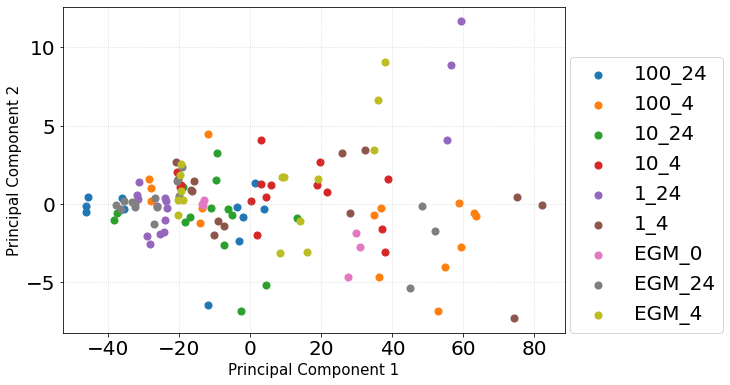

In [24]:
fig = matplotlib.pyplot.figure(figsize=(9, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

conditions = list(set(principalDf['labels'].to_list()))
conditions.sort()
print(conditions, len(conditions))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']
print(colors, len(colors))

for condition, color in zip(conditions, colors):
    indicesToKeep = principalDf['labels'] == condition
    ax.scatter(principalDf.loc[indicesToKeep, 'PC1'], principalDf.loc[indicesToKeep, 'PC2'], c=color, s=50)
ax.legend(conditions, loc=(1.01,0))
ax.grid(alpha=0.5, ls=':')


In [25]:
## 2.3. highly-variable peaks

In [26]:
## heatmap of most variable metabolites, using log2FC vs no adrenaline at t = 4 h and t = 24 h

In [27]:
## PCA on most variable metabolites using log2FC

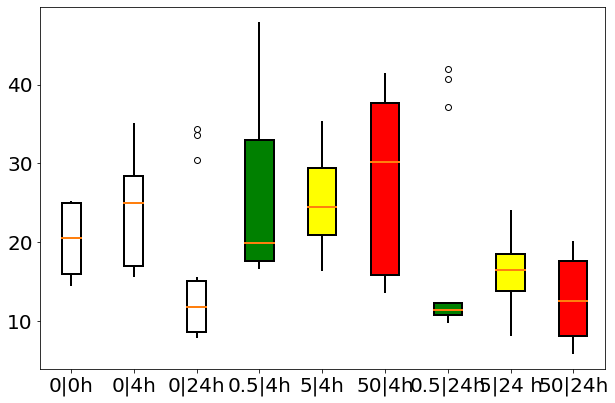

In [28]:
matplotlib.pyplot.boxplot(all_values[0:3], boxprops={'lw':2, 'facecolor':'white'}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True, positions=[1, 2, 3])

matplotlib.pyplot.boxplot(all_values[3:5], boxprops={'lw':2, 'facecolor':'green'}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True, positions=[4, 7])

matplotlib.pyplot.boxplot(all_values[5:7], boxprops={'lw':2, 'facecolor':'yellow'}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True, positions=[5, 8])

matplotlib.pyplot.boxplot(all_values[7:9], boxprops={'lw':2, 'facecolor':'red'}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True, positions=[6, 9])

matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['0|0h', '0|4h', '0|24h', '0.5|4h', '5|4h', '50|4h', '0.5|24h', '5|24 h', '50|24h'])

matplotlib.pyplot.tight_layout()

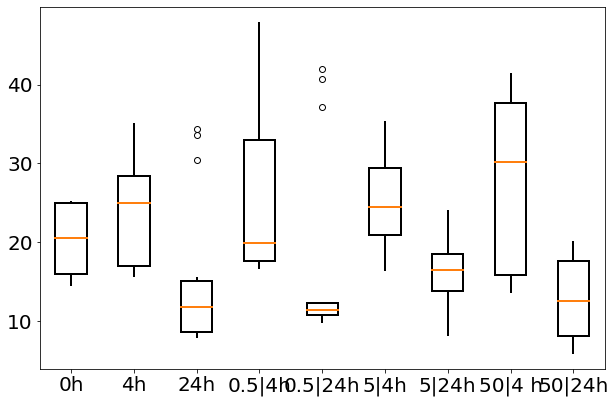

In [29]:
matplotlib.pyplot.boxplot(all_values, boxprops={'lw':2, 'facecolor':'white'}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=False, patch_artist=True)

matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['0h', '4h', '24h', '0.5|4h', '0.5|24h', '5|4h', '5|24h', '50|4 h', '50|24h'])
matplotlib.pyplot.tight_layout()
